In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm


In [3]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def loss(x):
    return himmelblau(x[0], x[1])

In [5]:
# hyperparameters
episodes = 20
gens = 100

# scale [0,1] to [0,4], then shift it left so that it's [-2,2]
# x corresponds to an array of network parameters
x = np.random.rand(2) * 4 - 2


plot_xs = np.array([x])

# initial parent x
x_p = x
best_loss = loss(x_p)
for e in range(episodes):
    n = np.random.normal(scale=0.5, size=(gens, 2))
    for i in range(gens):
        x = x_p + n[i, :]
        x_loss = loss(x)
        if x_loss < best_loss:
            best_fit = x_loss
            curr_best_x = x

    x_p = curr_best_x
    # numpy is weird and this is the way I found to append an array at the end of some other array
    plot_xs = np.stack((*plot_xs, x_p))

print(plot_xs)

[[ 1.98872299 -0.86181134]
 [ 2.29709934 -0.09597899]
 [ 2.12418646  0.16233334]
 [ 2.33672698  1.20295183]
 [ 2.40101382  0.95178801]
 [ 1.96250249  1.40098419]
 [ 2.15620822  0.62399223]
 [ 2.17775436  0.14217669]
 [ 2.2786001   0.63518058]
 [ 2.36196044  0.81086856]
 [ 2.70699128  0.9571779 ]
 [ 2.44868311  2.00169599]
 [ 2.74896183  2.74781797]
 [ 2.6221177   3.27850103]
 [ 2.61729216  3.51865869]
 [ 2.72140785  2.38106965]
 [ 2.27304293  1.4989104 ]
 [ 1.87288064  1.43551681]
 [ 2.07356662  1.66405751]
 [ 2.62451974  2.04693777]
 [ 2.95455494  2.06727946]]


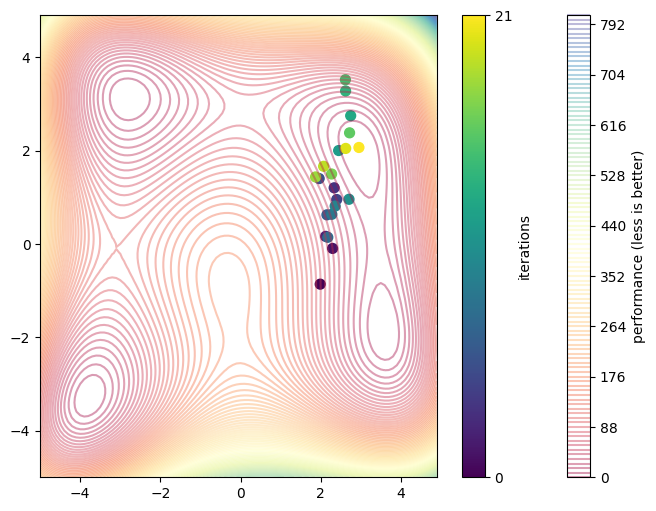

In [14]:

fig = plt.figure(figsize=(8, 6))
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
cba = fig.colorbar(cs)
cba.set_label('performance (less is better)')

plot_z = np.linspace(0, 1, plot_xs.shape[0])
xs = plt.scatter(plot_xs[:, 0], plot_xs[:, 1], s=50, c=plot_z, cmap=cm.viridis)
cbb = fig.colorbar(xs)
cbb.set_label('iterations')
cbb.set_ticks([0, 1])
cbb.set_ticklabels([0, len(plot_xs)])
plt.show()